In [1]:
# import required libraries
import pandas as pd
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# retrive data
ku_suburb_df = pd.read_excel('Kuwait City Suburbs.xlsx', sheet_name='Kuwait Suburbs')

# remove unneeded data of suburbs with no or very small population
ku_suburb_df = ku_suburb_df.drop(ku_suburb_df.index[30])
ku_suburb_df = ku_suburb_df.drop(ku_suburb_df.index[30])
ku_suburb_df = ku_suburb_df.drop(ku_suburb_df.index[30])

ku_suburb_df

,Suburb,Population,Kuwaiti,Asian,Arab,African,Others,Lantitude,Longitude
0,Rawda,40729,23800,14049,2148,569,163,29.328803,47.998617
1,Jaber Al Ahmad,40591,25893,9814,4134,606,144,29.348764,47.760121
2,Surra,37742,21058,13221,2549,428,486,29.313902,48.008462
3,Sharq,37291,1146,21514,14096,0,535,29.382534,47.987654
4,Bneid Al-Gar,35538,765,22050,11743,222,758,29.375463,48.004040
5,Sulaibikhat,34987,16068,10198,8097,487,137,29.315093,47.840398
6,Qortuba,34809,20124,12363,1607,536,179,29.312451,47.985509
7,Doha,32196,15754,8885,6973,470,114,29.315636,47.816701
8,Kaifan,29444,16014,10375,2478,403,174,29.337218,47.959121
9,Yarmouk,25491,14158,9353,1523,337,120,29.313075,47.969369


In [3]:
CLIENT_ID = 'EEIBLAZF0N0O3B3VPXTBD05RGGACNRGTNTP1UQTSYYBBPBWT'
CLIENT_SECRET = 'YUAQLMHXX1ZXPIFV5YTAE4RVQSFSHIAQSXI4ENYEHUUGFY5T'
VERSION = '20180605'
radius = 500 # define radius
LIMIT = 100

In [4]:
# defining coffee shop GET venues function
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Lantitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Lantitude', 
                  'Venue Longitude', 
                  'Venue Category']
    nearby_venues = nearby_venues[(nearby_venues['Venue Category'] == 'Coffee Shop') 
                                  | (nearby_venues['Venue Category'] == 'Café')] # get only coffee shops and cafés
    return(nearby_venues)

In [5]:
# get suburbs coffee shops
ku_venues = getNearbyVenues(names = ku_suburb_df['Suburb'],
                                   latitudes = ku_suburb_df['Lantitude'],
                                   longitudes = ku_suburb_df['Longitude']
                                  )

Rawda
Jaber Al Ahmad
Surra
Sharq
Bneid Al-Gar
Sulaibikhat
Qortuba
Doha
Kaifan
Yarmouk
Qadsiya
Faiha
Abdullah al-Salem
Adailiya
Daiya
Khaldiya
Dasma
Shamiya
Jibla
Nuzha
Granada
Mansouriya
Mirqab
Shuwaikh Residential
Shuwaikh Industrial 1
Mubarekiya Camps and Collages
Dasman
Shuwaikh Industrial 3
Shuwaikh Industrial 2
Shuwaikh Medical


In [6]:
# merging retrieved data with previous dataframe
ku_pop_coffee = pd.merge(ku_suburb_df, ku_venues, on = 'Suburb', how = 'left')
del ku_pop_coffee['Lantitude']
del ku_pop_coffee['Longitude']

In [7]:
# get the number of coffee shops "venues" in each suburb
ku_pop_coffee_reg = ku_pop_coffee.groupby('Suburb').count()
ku_coffee_count = ku_pop_coffee_reg[['Venue']]

result = pd.merge(ku_suburb_df, ku_coffee_count, on = 'Suburb', how = 'left')

result['Venue'] = result['Venue'].fillna(0)
result = result.sort_values(by = 'Kuwaiti', ascending = False)
result.head()

,Suburb,Population,Kuwaiti,Asian,Arab,African,Others,Lantitude,Longitude,Venue
1,Jaber Al Ahmad,40591,25893,9814,4134,606,144,29.348764,47.760121,0
0,Rawda,40729,23800,14049,2148,569,163,29.328803,47.998617,1
2,Surra,37742,21058,13221,2549,428,486,29.313902,48.008462,1
6,Qortuba,34809,20124,12363,1607,536,179,29.312451,47.985509,1
5,Sulaibikhat,34987,16068,10198,8097,487,137,29.315093,47.840398,0


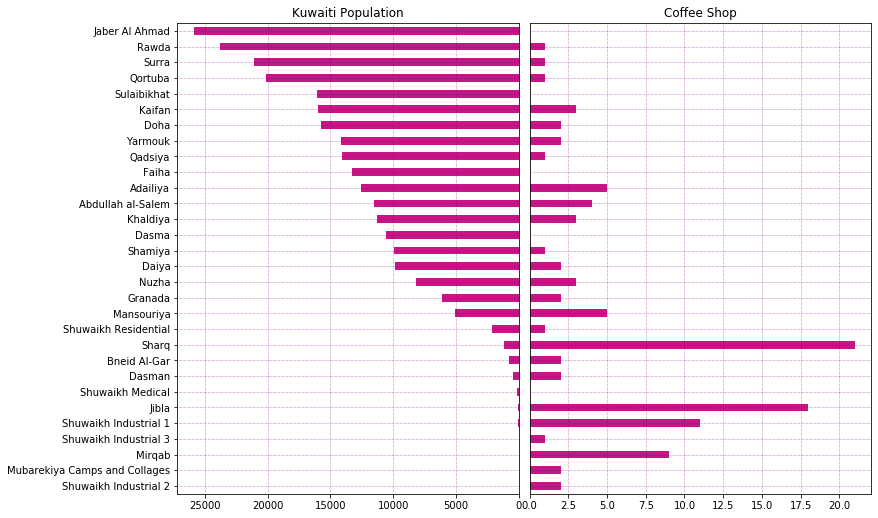

In [8]:
# create a bar graph of coffee shops and population in each suburb
data = result[['Suburb', 'Kuwaiti']].sort_values(by = 'Kuwaiti')
grap = plt.subplot(1, 2, 1)
grap = data['Kuwaiti'].plot(kind='barh', figsize=(12, 7), color='mediumvioletred')
grap.set_title('Kuwaiti Population')
grap.set_yticklabels(data['Suburb'])
grap.grid(color='purple', linestyle=':', linewidth=0.5)
grap.invert_xaxis()

data2 = result[['Suburb', 'Kuwaiti', 'Venue']].sort_values(by = 'Kuwaiti')
grap2 = plt.subplot(1, 2, 2)
grap2 = data2['Venue'].plot(kind='barh', figsize=(12, 7), color='mediumvioletred')
grap2.set_title('Coffee Shop');
grap2.grid(color='purple', linestyle=':', linewidth=0.5)
grap2.tick_params(axis = "y", which = "both", right = False, left = False)
grap2.set_yticklabels('')


plt.tight_layout(pad=0.01, w_pad=0.01, h_pad=0.01)
plt.show()

In [9]:
# get recommended suburbs for a new coffee shop
print('There are', result['Kuwaiti'].sum(), 'Kuwaiti\'s in Kuwait City and There are', result['Venue'].sum(), 'opened Coffee Shops', )
print('Kuwaiti per Coffee Shop ', round(result['Kuwaiti'].sum()/result['Venue'].sum()))
result[['Suburb', 'Kuwaiti']].loc[result['Venue'] == 0].sort_values(by = 'Kuwaiti', ascending = False).head(4)

There are 270075 Kuwaiti's in Kuwait City and There are 105 opened Coffee Shops
Kuwaiti per Coffee Shop  2572.0


,Suburb,Kuwaiti
1,Jaber Al Ahmad,25893
5,Sulaibikhat,16068
11,Faiha,13299
16,Dasma,10545


In [10]:
# create map of Kuwait City using latitude and longitude values
map_ku = folium.Map(location=[29.35, 47.90], zoom_start=12)
sum_kuwaiti = ku_suburb_df['Kuwaiti'].sum()

# add suburbs population concentration markers to map
for lat, lng, suburb, kuwaiti in zip(ku_suburb_df['Lantitude'], ku_suburb_df['Longitude'],
                                        ku_suburb_df['Suburb'], ku_suburb_df['Kuwaiti']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(kuwaiti/sum_kuwaiti)*350,
        popup=label,
        color='mediumvioletred',
        fill=True,
        fill_color='mediumvioletred',
        fill_opacity=0.2,
        parse_html=False).add_to(map_ku)

# plot coffee shops locations in the map    
for lat, lng, venue in zip(ku_pop_coffee['Venue Lantitude'], ku_pop_coffee['Venue Longitude'],
                                        ku_pop_coffee['Venue']):
        if venue == '' or pd.notnull(venue):
            label = '{}'.format(venue)
            label = folium.Popup(label, parse_html=True)
            folium.Circle(
                [lat, lng],
                radius=1,
               popup=label,
               color= 'purple',
               parse_html=False).add_to(map_ku)
map_ku